# Matplotlib Pie Plots Problems

**plt.pie()**

In [23]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Health Insurance Pie Chart (2.14.1) - Problem

Create a pie chart to show the proportion of job postings that mention health insurance for Data Analyst roles only:

- Create a new DataFrame called **df_DA** that only gets Data Analyst roles.
- Then count the number of data analyst roles that mention or not mention health insurance by using the **job_health_insurance** column.
- Plot this using **plt.pie()**, setting **labels** parameter to **['No', 'Yes']**, **startangle** to 90, and format values to display similarly to **23.1%**.
- Set the title to 'Proportion of Data Analyst Jobs Mentioning Health Insurance'.

Hint:

Use the **plt.pie()** function to create the pie chart and the **value_counts()** method to get the distribution of health insurance mentions.

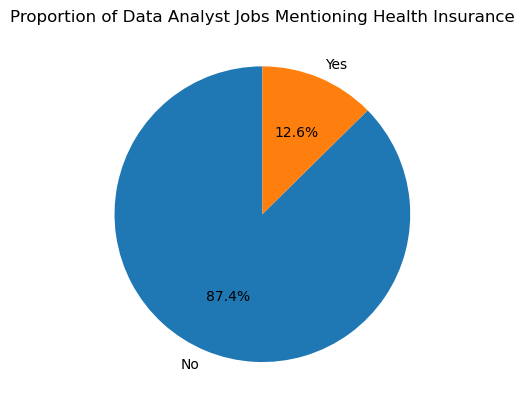

In [24]:
df_DA = df[df['job_title_short'] == 'Data Analyst']
df_DA['job_health_insurance'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', labels=['No','Yes']) 
plt.title('Proportion of Data Analyst Jobs Mentioning Health Insurance')
plt.ylabel('')

plt.show()


### Job Schedule Distribution (2.14.2) - Problem


- Create a pie chart showing the count of job postings per job schedule types (for only jobs that are either 'Full-time' and 'Part-time') in the DataFrame.
- Create a DataFrame to filter out these **job_schedule_type** called **df_ft_pt**.
- Plot this using **plt.pie()**, setting **labels** parameter to the index, **startangle** to 90, and format values to display similarly to **23.1%**.
- Add a title 'Job Schedule Full-time vs. Part-time'.

Hint:

Use the **plt.pie()** function to create the pie chart and **plt.title()** to add the title.

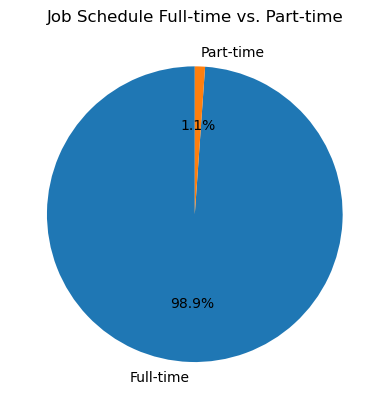

In [25]:
df_ft_pt = df[(df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Part-time')].copy()
job_schedule_counts = df_ft_pt['job_schedule_type'].value_counts()
plt.pie(job_schedule_counts, labels = job_schedule_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Job Schedule Full-time vs. Part-time')
plt.ylabel('')
plt.show()

### Degree Mentioned Pie Chart (2.14.3) - Problem


- Create a pie chart to show the distribution of job postings that mention a degree in the job posting versus those that do not.
- Only get job postings located in the US, create a new DataFrame with this filtered data called **df_US**.
- Use the **job_no_degree_mention** column for this purpose.
- Customize the pie chart by exploding the slice for jobs that do not mention a degree. (Use the **explode** parameter set to **(0, 0.1)** inside of **plt.pie()**)
- Set the chart title as 'Distribution of Jobs Mentioning Degrees for US Job Postings'.

Hint:

Use the **plt.pie()** function to create the pie chart and the **value_counts()** method to get the distribution of degree requirements for US jobs. Use the **explode** parameter to highlight the slice for jobs that do not require a degree.


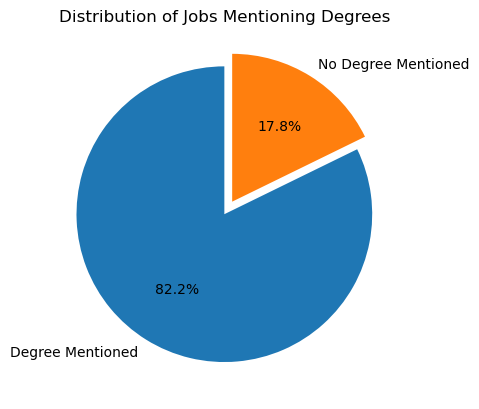

In [38]:
df_US = df[df['job_country'] == 'United States'].copy()
degrees = df_US['job_no_degree_mention'].value_counts()
plt.pie(degrees, labels=['Degree Mentioned', 'No Degree Mentioned'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Distribution of Jobs Mentioning Degrees')
plt.show()